# Project Synopsis

Predicting employee turnover within the company by periodically evaluating employees' work details including:
- number of projects they worked upon
- average monthly working hours
- time spent in the company
- promotions in the last 5 years
- salary level

Data from prior evaluations show the employee’s satisfaction at the workplace. The data is used to identify patterns in employee's work style and their interest to continue to work in the company. The HR Department owns the data and uses it to predict employee turnover.

As part of this project, ML Programs have been created to:
1. Perform data quality check by checking for missing values if any.
2. Understand what factors contributed most to employee turnover by EDA.
3. Perform clustering of Employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.


#### Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

#### Load the data into a dataframe

In [ ]:
employee_df = pd.read_excel(r'C:\Users\maria\OneDrive\Documents\EDU\AI ML\Class\Projects\Employee Turnover Analytics\1688640705_hr_comma_sep.xlsx')
employee_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1.	Perform data quality check by checking for missing values if any.

#### Check data types of columns

In [ ]:
employee_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 2.7 MB


- Number of observations: 14999
- Number of columns: 10
- Data types of columns:
    Numberical = 8 (6 int, 2 float)
    Categorical = 2
- Data size: 2.7 MB

#### Checking for Null values

In [ ]:
employee_df.isna().mean()

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64

There are no null values in the dataset

#### Checking statisics of numerical columns

In [ ]:
employee_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- **['satisfaction_level']** has as left tail as mean is smaller that the median. Scale has same order of magnitude from 0.09 to 1.
- **['last_evaluation']** has as left tail as mean is smaller that the median. Scale has same order of magnitude from 0.36 to 1.
- **['number_project']** has as left tail as mean is smaller that the median. Scale lies within one order of magnitude from 2 to 7.
- **['average_montly_hours']** has as right tail as mean is greater that the median. Scale lies withing 3 orders of magnitude from 96 to 310.
- **['time_spend_company']** has as right tail as mean is greater that the median. Scale lies withing 2 orders of magnitude from 2 to 10.
- **['Work_accident']** has as right tail as mean is greater that the median. Scale has same order of magnitude from 0 to 1.
- **['left']** has as right tail as mean is greater that the median. cale has same order of magnitude from 0 to 1.
- **['promotion_last_5years']** has as right tail as mean is greater that the median. cale has same order of magnitude from 0 to 1.

#### Understanding distribution of categorical columns

In [ ]:
employee_df.describe(include='object')

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


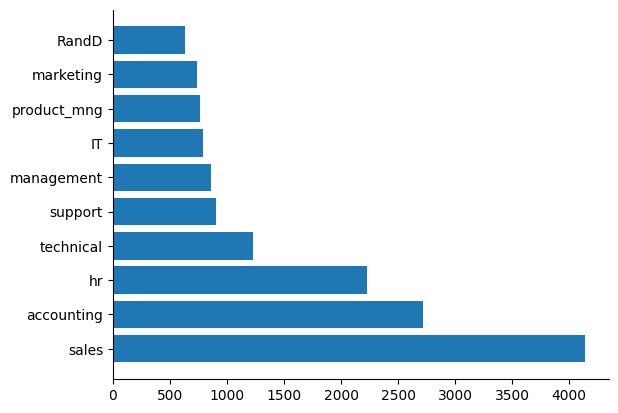

In [ ]:
plt.barh(employee_df.sales.unique(), width=employee_df.sales.value_counts())
sns.despine()
plt.show()

There are 10 departments and Sales has the largest proportion of employees.

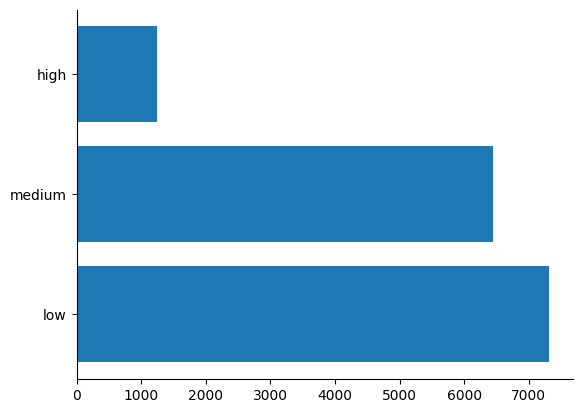

In [ ]:
plt.barh(employee_df.salary.unique(), width=employee_df.salary.value_counts())
sns.despine()
plt.show()

Majority of the employess fall into the 'low' salary bracket.

## 2.	Understand what factors contributed most to employee turnover by EDA.

### 2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

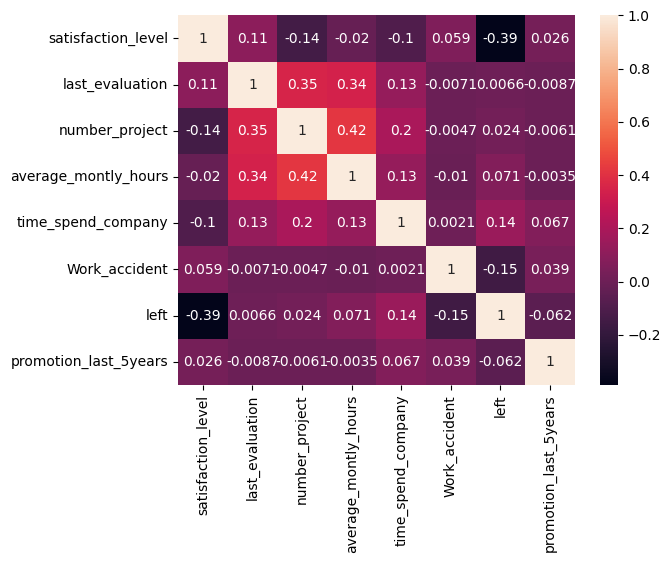

In [ ]:
# Create a dataframe with numerical features
numerical_cols = employee_df.select_dtypes(include=['int64','float64'])

sns.heatmap(numerical_cols.corr(), annot=True)
plt.show()

From the heatmap we observe,
- There is a strong negative correlation between ['left'] and ['satisfaction_level'] : As the employee satisfaction decreases, employee attrition increases.

### 2.2.	Draw the distribution plot of
- Employee Satisfaction
- Employee Evaluation
- Employee Average Monthly Hours


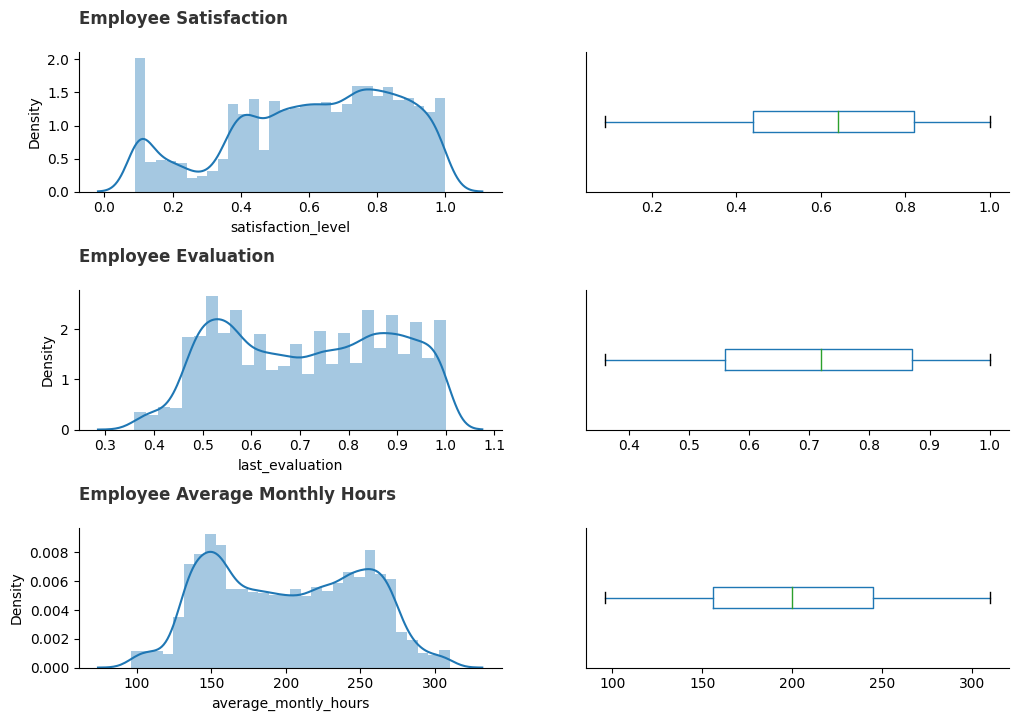

In [ ]:
columns=['satisfaction_level','last_evaluation','average_montly_hours']
titles=['Employee Satisfaction', 'Employee Evaluation', 'Employee Average Monthly Hours']

fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(12,8))
plt.subplots_adjust(hspace=0.7) # Increase vertical space between subplots

for i, col in enumerate(columns):
    sns.distplot(employee_df[col], ax=axes[i,0])
    employee_df.boxplot(column=col, ax=axes[i,1], grid=False, vert=False)
    axes[i,0].set_title(titles[i], loc='left', fontweight='bold', color='#333333', pad=20) # set column title
    axes[i,1].set_yticks([]) # remove column label from boxplot
    sns.despine()



### 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization  and give your inferences from the plot.

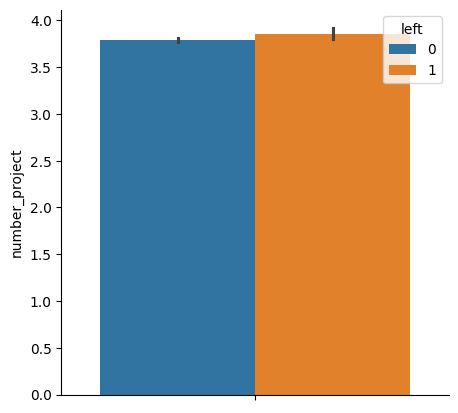

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=employee_df,y='number_project', hue='left')
sns.despine()
plt.show()

We infer that:
- Both employees who left and who stayed in the organization were involved in more than 3 projects during their tenure.
- i.e. There is not much difference in number of projects between an employee who left one who has stayed.
- Therefore, we can infer that employees are not leaving the firm due to lack of projects.

## 3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

### 3.1.	Choose columns satisfaction_level, last_evaluation and left.

In [ ]:
# Create dataframe of employees that left
cluster_df = employee_df[employee_df['left']==1]
cluster_df = cluster_df[['satisfaction_level','last_evaluation']]
cluster_df.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


### 3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

In [ ]:
from sklearn.cluster import KMeans

# Instantiate the model
kmeans = KMeans(n_clusters=3, random_state=123)

# Fit
kmeans.fit(cluster_df)

# Add cluster label to the dataframe
cluster_df['Label'] = kmeans.labels_
cluster_df.head()

,satisfaction_level,last_evaluation,Label
0,0.38,0.53,1
1,0.80,0.86,2
2,0.11,0.88,0
3,0.72,0.87,2
4,0.37,0.52,1


#### Visualize the clusters using a scatterplot

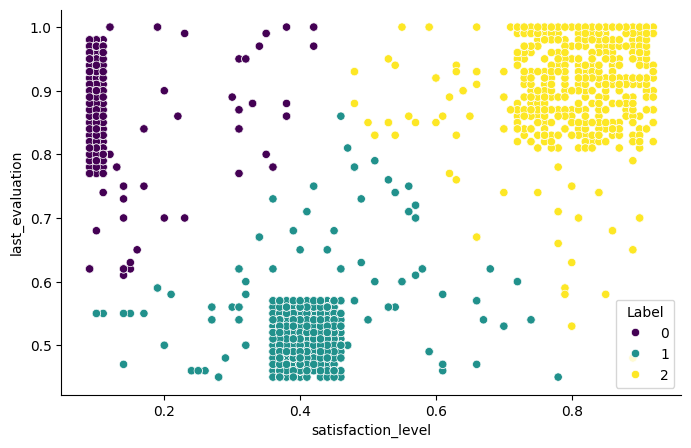

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cluster_df, x='satisfaction_level', y='last_evaluation', hue='Label', palette='viridis')
sns.despine()
plt.show()

#### Plot the percentage composition of each cluster

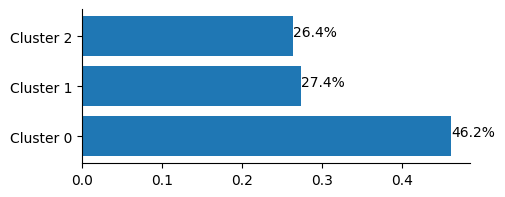

In [ ]:
cluster_count = pd.DataFrame({'Counts' : cluster_df.Label.value_counts(), \
                              'Percentage' : cluster_df.Label.value_counts()/ len(cluster_df)
                             })

plt.figure(figsize=(5,2))
plt.barh(['Cluster 0', 'Cluster 1', 'Cluster 2'], width=cluster_count['Percentage'])

# Adding labels to bars
for i, value in enumerate(cluster_count['Percentage']):
    plt.text(value,i,  str(round(value*100,1)) + '%')

sns.despine()
plt.show()

By clustering the employees who left the company into 3 clusters, we see that:
- 46% of the employees are in Cluster 0
- 27% are in Cluster 1
- 26% are in Cluster 2

### 3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

**Cluster 0**
- This is the largest cluster that is made up of 46% of the employees who have left the company.
- From the scatterplot, we can make below inference about employees belonging to this cluster:
    1. Satisfaction: Moderately satisfied with the job
    2. Last evaluation: Evaluated poorly indicating they are weak performers
- Thus Cluster 0 caters to ***Weak performers with Medium job satisfaction***
    
**Cluster 1**
- This cluster is made up of 27% of the employees who have left the company.
- From the scatterplot, we can make below inference about employees belonging to this cluster:
    1. Satisfaction: Highly satisfied with the job
    2. Last evaluation: Highly rated indicating they are good performers
- Thus Cluster 1 caters to ***Good performers with High job satisfaction***

**Cluster 2**
- This cluster is made up of 26% of the employees who have left the company.
- From the scatterplot, we can make below inference about employees belonging to this cluster:
    1. Satisfaction: Not satisfied with the job
    2. Last evaluation: Highly rated indicating they are good performers
- Thus Cluster 2 caters to ***Good performers with Low job satisfaction***

## 4.	Handle the left Class Imbalance using SMOTE technique.

#### Checking for class imbalance in target variable 'left'

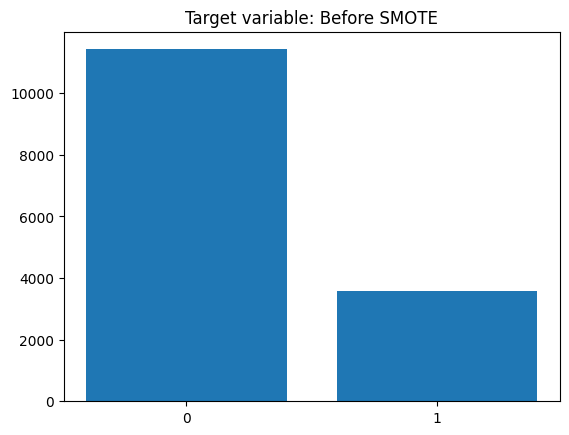

In [ ]:
plt.bar(['0','1'],employee_df['left'].value_counts())
plt.title('Target variable: Before SMOTE')
plt.show()

We see that there is class imbalance in the target variable 'left'

### 4.1.	Pre-Process the data by converting categorical columns to numerical columns

- Separating categorical variables and numeric variables.

In [ ]:
a = employee_df.apply(lambda x: x.name not in numerical_cols.columns)
categorical_cols = employee_df.loc[:,a]
print('Categorical columns:')
categorical_cols.head()

Categorical columns:


,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


- Applying get_dummies() to the categorical variables.

In [ ]:
one_hot_encoded = pd.get_dummies(categorical_cols).astype(int)
one_hot_encoded.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


- Combining categorical variables and numeric variables.

In [ ]:
employee_df_encoded = pd.concat([numerical_cols, one_hot_encoded], axis=1)
employee_df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20

#### Split columns into features and target

In [ ]:
X = employee_df_encoded.drop(columns='left')
y = employee_df_encoded['left']

#### Stratified split

- Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.
- In other words, it maintains the same mixture of classes in both the training and validation sets that it creates.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

### 4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [ ]:
# Check statistics of numerical columns before using SMOTE
X_train.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,0.612794,0.714968,3.803650,200.848987,3.497541,0.144512,0.021502,0.080840,0.052838,0.051004,0.048671,0.041753,0.057671,0.061005,0.273439,0.150596,0.182182,0.078757,0.489207,0.432036
std,0.248442,0.170967,1.229852,49.945405,1.456935,0.351623,0.145056,0.272601,0.223719,0.220016,0.215188,0.200034,0.233131,0.239350,0.445743,0.357669,0.386010,0.269370,0.499904,0.495380
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ['number_project'] has a left tail as mean is smaller than the median. Scale lies in the same order of magnitude from 2 to 7.
- ['average_montly_hours'] has a normal distribution as its mean is almost similar to the median. Scale lies within 2 orders of magnitude from 96 to 310.
- ['time_spend_company'] has a normal distribution as its mean is almost similar to the median. Scale lies within 2 orders of magnitude from 2 to 10.
- The above three columns need to be scaled. All the other columns have the same scale ranging from 0 to 1.

#### Scaling columns before applying SMOTE

In [ ]:
from sklearn.preprocessing import RobustScaler

# Instantiate
scaler = RobustScaler()

# Fit
scaler.fit(X_train, y_train)

# Transform
X_train_transformed = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_transformed  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Checking statistics after scaling
X_train_transformed.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,-0.071594,-0.016233,-0.098175,0.009539,0.497541,0.144512,0.021502,0.080840,0.052838,0.051004,0.048671,0.041753,0.057671,0.061005,0.273439,0.150596,0.182182,0.078757,0.489207,0.432036
std,0.653795,0.551507,0.614926,0.561184,1.456935,0.351623,0.145056,0.272601,0.223719,0.220016,0.215188,0.200034,0.233131,0.239350,0.445743,0.357669,0.386010,0.269370,0.499904,0.495380
min,-1.447368,-1.161290,-1.000000,-1.168539,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.526316,-0.516129,-0.500000,-0.494382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.473684,0.483871,0.500000,0.505618,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.947368,0.903226,1.500000,1.235955,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Over sampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate
oversample = SMOTE(random_state=123)

# Fit-resample
X_train_smote, y_train_smote = oversample.fit_resample(X_train_transformed, y_train)

# Converting to dataframe
y_train_smote = pd.DataFrame(y_train_smote, columns=['left'])

#### Checking if the class imbalance in target variable 'left' is removed after SMOTE

In [ ]:
print('Before SMOTE:')
print('Shape of train dataset features:', X_train.shape)
print('Shape of train dataset target:', y_train.shape)
print('\n')
print('After SMOTE:')
print('Shape of train dataset features:', X_train_smote.shape)
print('Shape of train dataset target:', y_train_smote.shape)

Before SMOTE:
Shape of train dataset features: (11999, 20)
Shape of train dataset target: (11999,)


After SMOTE:
Shape of train dataset features: (18284, 20)
Shape of train dataset target: (18284, 1)


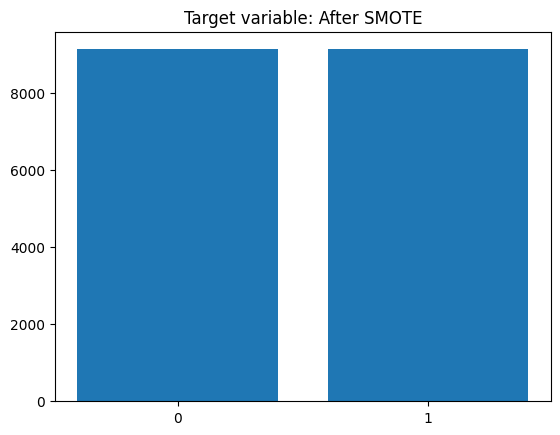

In [ ]:
plt.bar(['0','1'],y_train_smote['left'].value_counts())
plt.title('Target variable: After SMOTE')
plt.show()

Hence we see that the class imbalance in target variable has been removed using SMOTE.

## 5.	Perform 5-Fold cross-validation model training and evaluate performance.

### 5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.
### 5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
### 5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
# Import required libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Instantiate
logreg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=123, min_samples_split=5)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, min_samples_split=4)

# Define algorithms to try
algorithms = [
    ('Gradient Boosting Classifier', gbc),
    ('Logistic Regression', logreg),
    ('Random Forest Classifier', rfc)
]

# Define a function to evaluate model performance
def evaluate_model(name, model, X_train, X_test, y_train, y_test):

    # Fit-Predict-Evaluate
    start_time = time.time()
    accuracy_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    precision_score = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    recall_score = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    f1_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    roc_auc_score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    runtime = time.time() - start_time

    test=[]
    for i in range(5):
        test.append({
        'Algorithm' : name,
        'Fold' : i+1,
        'Accuracy' : accuracy_score[i],
        'Precision' : precision_score[i],
        'Recall' : recall_score[i],
        'F1-score' : f1_score[i],
        'ROC/AUC' : roc_auc_score[i],
        'Runtime (in secs)' : runtime})

    return pd.DataFrame(test)


# Evaluate individual model performance
model_comparison_kf=pd.DataFrame()
for name, model in algorithms:
    metrics = evaluate_model(name, model, X_train_smote, X_test_transformed, y_train_smote, y_test)
    model_comparison_kf=pd.concat([model_comparison_kf,metrics], axis=0)


model_comparison_kf



,Algorithm,Fold,Accuracy,Precision,Recall,F1-score,ROC/AUC,Runtime (in secs)
0,Gradient Boosting Classifier,1,0.968553,0.986924,0.949672,0.967940,0.988406,191.528039
1,Gradient Boosting Classifier,2,0.979218,0.988839,0.969365,0.979006,0.994058,191.528039
2,Gradient Boosting Classifier,3,0.987968,0.990110,0.985238,0.987939,0.998968,191.528039
3,Gradient Boosting Classifier,4,0.987148,0.982665,0.991799,0.987211,0.997600,191.528039
4,Gradient Boosting Classifier,5,0.986324,0.986857,0.985777,0.986316,0.998614,191.528039
0,Logistic Regression,1,0.774679,0.755861,0.811269,0.782586,0.821396,5.879892
1,Logistic Regression,2,0.776866,0.761364,0.806346,0.783209,0.827748,5.879892
2,Logistic Regression,3,0.778234,0.758114,0.817387,0.786635,0.841651,5.879892
3,Logistic Regression,4,0.779601,0.771641,0.794423,0.782866,0.842249,5.879892
4,Logistic Regression,5,0.792396,0.772287,0.829322,0.799789,0.844944,5.879892


## 6.	Identify the best model and justify the evaluation metrics used.

### 6.1.	Find the ROC/AUC for each model and plot the ROC curve.

#### Calculating average ROC/AUC across 5 folds for each model

In [ ]:
model_comparison_kf_avg = model_comparison_kf.groupby('Algorithm')[['Accuracy','Precision','Recall','F1-score', 'ROC/AUC',
       'Runtime (in secs)']].mean()
model_comparison_kf_avg

,Accuracy,Precision,Recall,F1-score,ROC/AUC,Runtime (in secs)
Algorithm,,,,,,
Gradient Boosting Classifier,0.981842,0.987079,0.976370,0.981682,0.995529,191.528039
Logistic Regression,0.780355,0.763853,0.811749,0.787017,0.835598,5.879892
Random Forest Classifier,0.954058,0.975935,0.931086,0.952970,0.986913,76.688059


#### Plotting the ROC curve

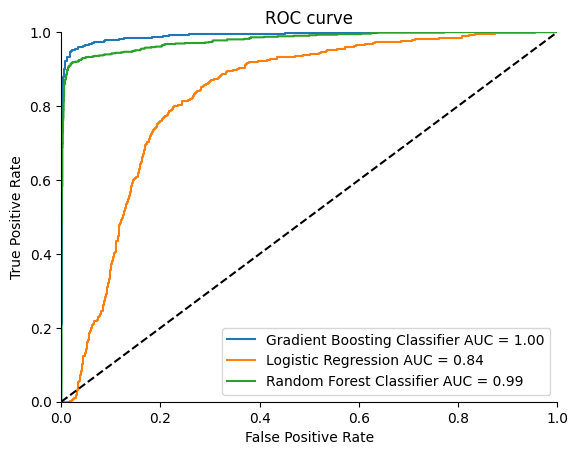

In [ ]:
from sklearn.metrics import confusion_matrix

cm=[]
for name, model in algorithms:
    # Fit-Predict
    model.fit(X_train_smote, y_train_smote)
    y_test_pred = model.predict(X_test_transformed)

    # Evaluate confusion matrix
    cm.append(confusion_matrix(y_test, y_test_pred))

    # Calculate probabilities
    y_test_proba = model.predict_proba(X_test_transformed)

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])

    # Fetching average ROC/AUC score computed above
    roc = model_comparison_kf_avg[model_comparison_kf_avg.index==name].loc[:,'ROC/AUC']

    # Plot the curve
    plt.plot(fpr, tpr, label= f'{name} AUC = %0.2f' %roc)

# Add confusion matrix to model comparison dataframe
model_comparison_kf_avg['Confusion Matrix']= cm

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
sns.despine()
plt.show()

### 6.2.	Find the confusion matrix for each of the models.

In [ ]:
model_comparison_kf_avg

,Accuracy,Precision,Recall,F1-score,ROC/AUC,Runtime (in secs),Confusion Matrix
Algorithm,,,,,,,
Gradient Boosting Classifier,0.981842,0.987079,0.976370,0.981682,0.995529,191.528039,"[[2241, 45], [39, 675]]"
Logistic Regression,0.780355,0.763853,0.811749,0.787017,0.835598,5.879892,"[[1725, 561], [134, 580]]"
Random Forest Classifier,0.954058,0.975935,0.931086,0.952970,0.986913,76.688059,"[[2222, 64], [58, 656]]"


#### Plotting the Confusion Matrix

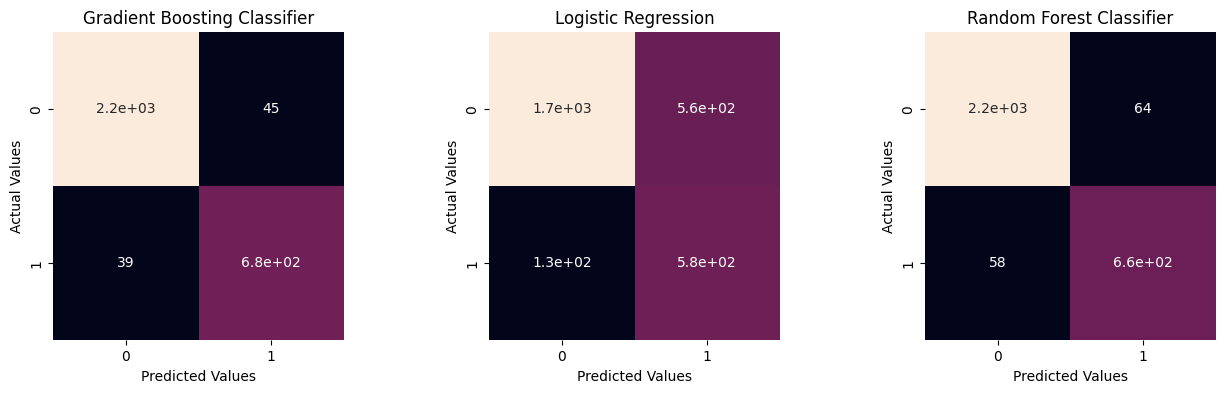

In [ ]:
fix, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
plt.subplots_adjust(wspace=0.5) # Add space between subplots

algs = model_comparison_kf_avg.index.tolist()

for i in range(len(algs)):
    sns.heatmap(model_comparison_kf_avg.iloc[i,6], ax=axes[i], annot=True, cbar=False)
    axes[i].set_title(algs[i])
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Actual Values')

plt.show()

### 6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?

Depending on the use case, we generally use -
- Recall when False Negatives have a higher cost eg. cancer detection
- Precision when False Positives have a higher cost eg. spam email classification

Here, we are predicting the probability of employee attrition where False Negatives will have a higher cost.
i.e. the model predicts that an employee will not leave the company but actually does.

Higher false positives on the other hand will have no strong consequence.
i.e. the model predicts that an employee will leave the company but actually does not.

Hence, we have to focus on maximizing Recall to minimize False Negatives.

From the confusion matrix, we see that the Gradient Boosting Classifier performs the best having the least number of False Negatives. Hence we will select the Gradient Boosting Classifier for predicting employee turnover as it provides the best balance of evaluation metrics and aligns with our goal of minimizing false negatives as per our business context.


## 7.	Suggest various retention strategies for targeted employees.

### 7.1.	Using the best model, predict the probability of employee turnover in the test data.

In [ ]:
# Using Gradient Boosting Classifier to predict probability of employee turnover

X_test_predicted = X_test.copy()
X_test_predicted['prb_score'] = gbc.predict_proba(X_test_transformed)[:,1]
X_test_predicted

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,prb_score
10627,0.98,0.77,3,191,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.000439
2703,0.76,0.93,3,271,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.991759
6059,0.70,0.93,3,185,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.015832
3258,0.48,0.61,3,223,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.002354
4565,0.57,0.90,3,144,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.004987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,0.84,0.96,3,161,2,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0.018108
4557,0.52,0.77,3,142,2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0.004416
6610,0.86,0.99,3,254,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.009229
10327,0.64,0.43,5,269,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.000051


### 7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
- Safe Zone (Green) (Score < 20%)
- Low Risk Zone (Yellow) (20% < Score < 60%)
- Medium Risk Zone (Orange) (60% < Score < 90%)
- High Risk Zone (Red) (Score > 90%).

In [ ]:
# Defining functions to compute risk zone, department and salary range

def risk_class(score):
    if score<0.2:
        return 'Safe'
    elif score<0.6:
        return 'Low'
    elif score<0.9:
        return 'Medium'
    else:
        return 'High'

def Department(sales_IT, sales_RandD, sales_accounting,sales_hr, sales_management, sales_marketing, sales_product_mng,sales_sales, sales_support, sales_technical):
    if sales_IT==1:
        return 'IT'
    elif sales_RandD==1:
        return 'RandD'
    elif sales_accounting==1:
        return 'accounting'
    elif sales_hr==1:
        return 'hr'
    elif sales_management==1:
        return 'management'
    elif sales_marketing==1:
        return 'marketing'
    elif sales_product_mng==1:
        return 'product_mng'
    elif sales_sales==1:
        return 'sales'
    elif sales_support==1:
        return 'support'
    elif sales_technical==1:
        return 'technical'

def Salary(salary_high,salary_low,salary_medium):
    if salary_high==1:
        return 'High'
    elif salary_low==1:
        return 'Low'
    else:
        return 'Medium'

In [ ]:
# Calculating Risk Zone
X_test_predicted['risk_zone'] = X_test_predicted['prb_score'].apply(risk_class)

# Calculating Department
X_test_predicted['department'] = X_test_predicted.apply(lambda x: Department(x['sales_IT'], x['sales_RandD'], x['sales_accounting'],
       x['sales_hr'], x['sales_management'], x['sales_marketing'], x['sales_product_mng'],
       x['sales_sales'], x['sales_support'], x['sales_technical']), axis=1)

# Calculating Salary
X_test_predicted['salary'] = X_test_predicted.apply(lambda x: Salary(x['salary_high'], x['salary_low'], x['salary_medium']), axis=1)

X_test_predicted.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,prb_score,risk_zone,department,salary
10627,0.98,0.77,3,191,2,0,0,0,0,0,...,1,0,0,0,0,1,0.000439,Safe,sales,Medium
2703,0.76,0.93,3,271,5,0,0,0,0,0,...,0,0,0,0,1,0,0.991759,High,hr,Low
6059,0.70,0.93,3,185,4,0,0,0,0,1,...,0,0,0,0,0,1,0.015832,Safe,accounting,Medium
3258,0.48,0.61,3,223,3,1,0,0,0,0,...,0,1,0,0,0,1,0.002354,Safe,support,Medium
4565,0.57,0.90,3,144,2,0,0,1,0,0,...,0,0,0,0,0,1,0.004987,Safe,IT,Medium


### Retention Strategy 1: Comparing each zone w.r.t. promotion received in the last 5 years

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


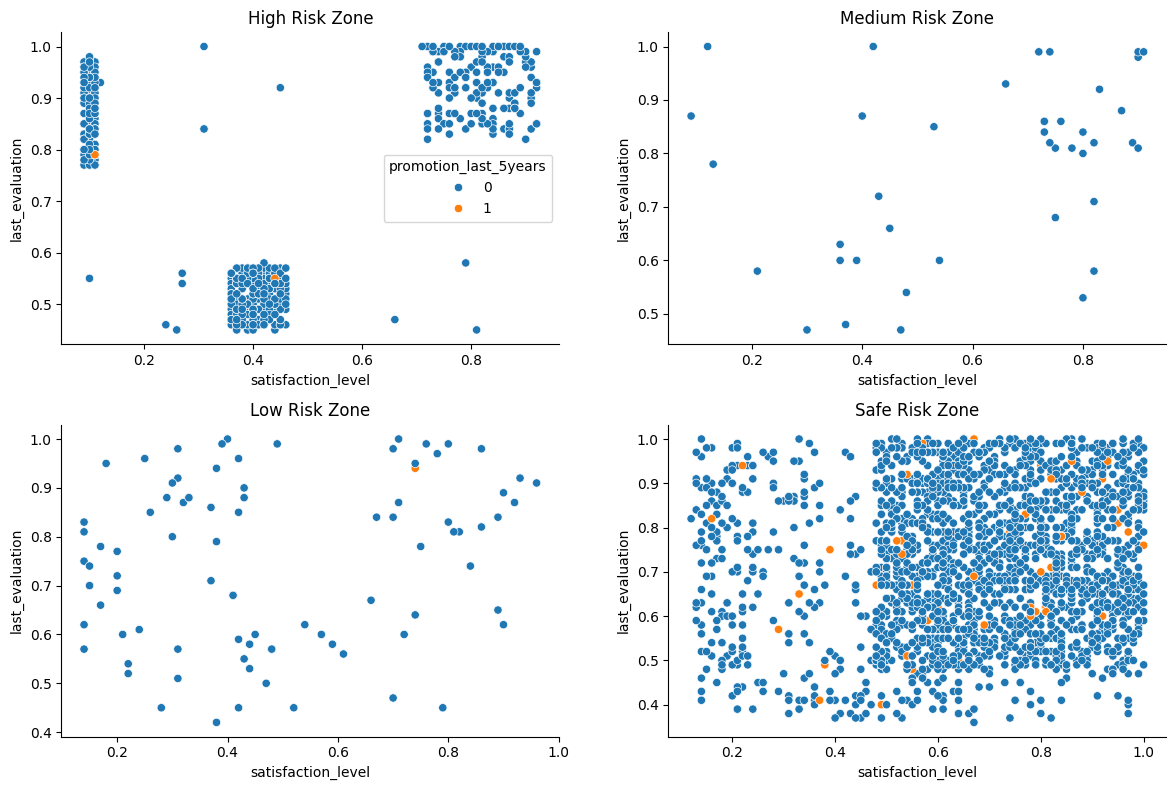

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=5, hspace=5)
axs_flat = axes.flatten()

j=0
for i, risk in enumerate(['High','Medium','Low', 'Safe']):
    data=X_test_predicted[X_test_predicted['risk_zone']==risk]
    if i<2:
        sns.scatterplot(data=data, x='satisfaction_level', y='last_evaluation', hue='promotion_last_5years', ax=axes[0,i])
        axes[0,i].set_title(risk+' Risk Zone')
        axes[0,1].legend().set_visible(False)
    else:
        sns.scatterplot(data=data, x='satisfaction_level', y='last_evaluation', hue='promotion_last_5years', ax=axes[1,j])
        axes[1,j].set_title(risk+' Risk Zone')
        axes[1,j].legend().set_visible(False)
        j+=1


plt.tight_layout()
sns.despine()
plt.show()

###### High Risk Zone:
We see that all employees who are highly satisfied with their job and have received a good evaluation last year have not been promoted in the last 5 years. To retain these high risk employees we can consider giving them a promotion.

###### Medium Risk Zone:
Not a single employee has received a promotion in the last 5 years. Promotion can be considered for those employees that have had a good evaluation last year.

###### Low Risk Zone:
Only 1 employee has received a promotion in the last 5 years. Promotions can be considered for deserving employees to keep the morale of the low risk zone employees up.

###### Safe Zone:
We see that there has been a good spread of promotions among these employees. Special attention can be paid to those employees who had a promotion in the past but had a poor evaluation last year.

### Retention Strategy 2: Comparing each zone w.r.t. time (years) spent with the company

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


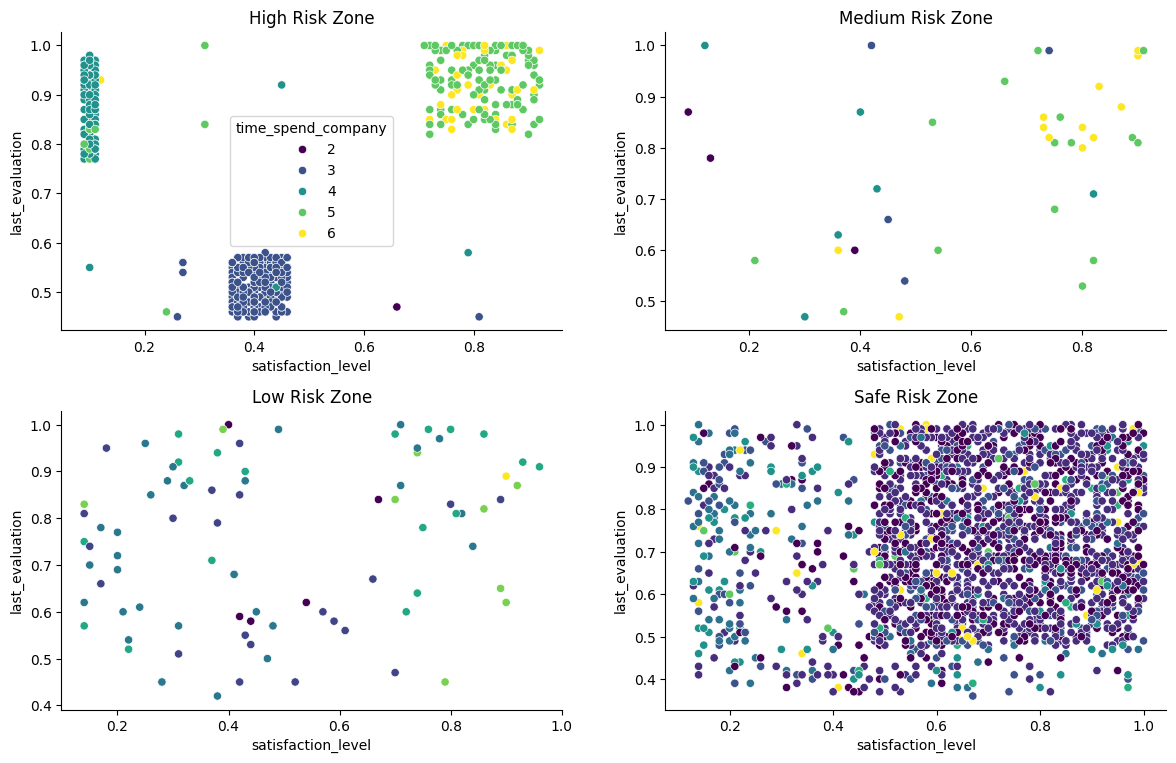

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=5, hspace=5)
axs_flat = axes.flatten()

j=0
for i, risk in enumerate(['High','Medium','Low', 'Safe']):
    data=X_test_predicted[X_test_predicted['risk_zone']==risk]
    if i<2:
        sns.scatterplot(data=data, x='satisfaction_level', y='last_evaluation', hue='time_spend_company', palette='viridis', ax=axes[0,i])
        axes[0,i].set_title(risk+' Risk Zone')
        axes[0,1].legend().set_visible(False)
    else:
        sns.scatterplot(data=data, x='satisfaction_level', y='last_evaluation', hue='time_spend_company', palette='viridis', ax=axes[1,j])
        axes[1,j].set_title(risk+' Risk Zone')
        axes[1,j].legend().set_visible(False)
        j+=1


plt.tight_layout()
sns.despine()
plt.show()

###### High Risk Zone
- Employees who have spent 5-6 years with the company having high satisfaction and good evaluation are at the highest risk.
1. Offer opportunities for leadership roles or special projects.
2. Provide pathways for continued growth and development.
3. Conduct regular engagement surveys and act on feedback promptly.
- Employees who have spent 3-4 years with the company have very low satisfaction and good evaluation last year.
1. Provide retention bonuses or incentives for top performers.
2. Explore opportunities for role changes or transfers within the company.
3. Conduct exit interviews to gather insights for retention improvement.
- Employees who have spent 2-3 years with the company have average satisfaction and evaluation.
1. Conduct immediate intervention through targeted support and resources.
2. Address any concerns related to job satisfaction or workload.
3. Offer mentorship or coaching for career guidance.


###### Medium Risk Zone
We see higher tenure employees with good satisfaction and evaluation are clustered in this zone. We can incentivize these employees with rewards and recognition for their contribution in order to retain them.
1. Offer leadership development programs for potential future roles.
2. Provide opportunities for involvement in strategic projects.
3. Conduct stay interviews to identify key factors for retention.

###### Low Risk Zone
Employees who have spent 3-4 years with the company are at lower risk of leaving.
1. Offer stretch assignments to keep employees engaged.
2. Provide avenues for involvement in decision-making processes.
3. Conduct career development workshops and seminars.

###### Safe Zone
Employees who have recent joined are usually not at risk of leaving the company. For these employees:
1. Focus on career growth opportunities within the company.
2. Offer training programs to enhance skills and knowledge.
3. Provide regular feedback and recognition for achievements.

### Retention Strategy 3: Comparing each zone w.r.t. average  monthly hours worked across departments

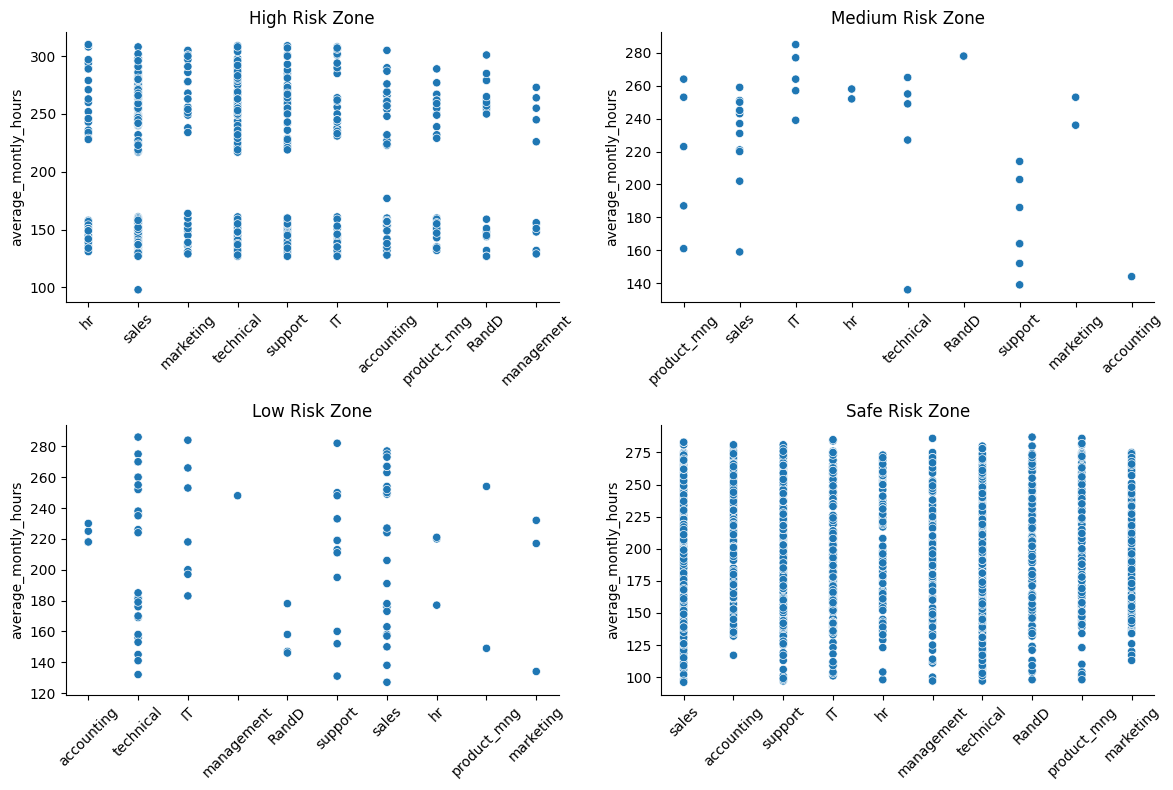

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=5, hspace=5)
axs_flat = axes.flatten()

j=0
for i, risk in enumerate(['High','Medium','Low', 'Safe']):
    data=X_test_predicted[X_test_predicted['risk_zone']==risk]
    if i<2:
        sns.scatterplot(data=data, x='department', y='average_montly_hours', hue='risk_zone', ax=axes[0,i])
        axes[0,i].set_title(risk+' Risk Zone')
        axes[0,i].legend().set_visible(False)
        axes[0,i].set_xticklabels(axes[0,i].get_xticklabels(), rotation=45)
        axes[0,i].set_xlabel('')
    else:
        sns.scatterplot(data=data, x='department', y='average_montly_hours', hue='risk_zone', ax=axes[1,j])
        axes[1,j].set_title(risk+' Risk Zone')
        axes[1,j].legend().set_visible(False)
        axes[1,j].set_xticklabels(axes[1,j].get_xticklabels(), rotation=45)
        axes[1,j].set_xlabel('')
        j+=1


plt.tight_layout()
sns.despine()
plt.show()


###### High Risk Zone
These are majorly technical, support and sales employees clearly clustered into 2 groups : 1) avg. monthly hours < 200   2) avg. monthly hours > 200
- avg. monthly hours < 200
1. Conduct immediate intervention and workload assessment.
2. Provide coaching and counseling for stress management and burnout prevention.
3. Offer opportunities for role rotation or job enrichment to reduce monotony.
- avg. monthly hours > 200
1. Implement mandatory time-off policies and encourage vacations.
2. Conduct thorough workload analysis and reallocation of tasks.
3. Provide support for work-related challenges and career planning discussions.


###### Medium Risk Zone
These are majorly sales employees. Highest number of hours are put in by IT employees who are at medium risk.
- avg. monthly hours < 200
1. Implement workload assessment and task prioritization strategies.
2. Offer support for time management and work delegation.
3. Conduct stress management workshops and resilience training.
- avg. monthly hours > 200
1. Provide avenues for feedback and suggestions for process improvement.
2. Offer additional resources or assistance for challenging projects.
3. Conduct wellness checks and offer support for work-life balance.

###### Low Risk Zone
These are majorly sales and technical department employees.
- avg. monthly hours < 200
1. Provide opportunities for skill enhancement and cross-training.
2. Encourage participation in company events and social activities.
3. Offer mentorship programs for professional growth and guidance.
- avg. monthly hours > 200
1. Conduct regular check-ins to ensure workload is manageable.
2. Provide resources and tools to improve efficiency and effectiveness.
3. Recognize and reward contributions to team and organizational goals.

###### Safe Zone
These employees are across all departments.
- avg. monthly hours < 200
1. Provide recognition and rewards for maintaining productivity.
2. Offer career development opportunities such as certifications or courses.
3. Implement initiatives to enhance team collaboration and morale.
- avg. monthly hours > 200
1. Encourage work-life balance through flexible scheduling options.
2. Offer wellness programs and stress management workshops.
3. Provide opportunities for telecommuting or remote work.

### Retention Strategy 4: Comparing each zone w.r.t. Salary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


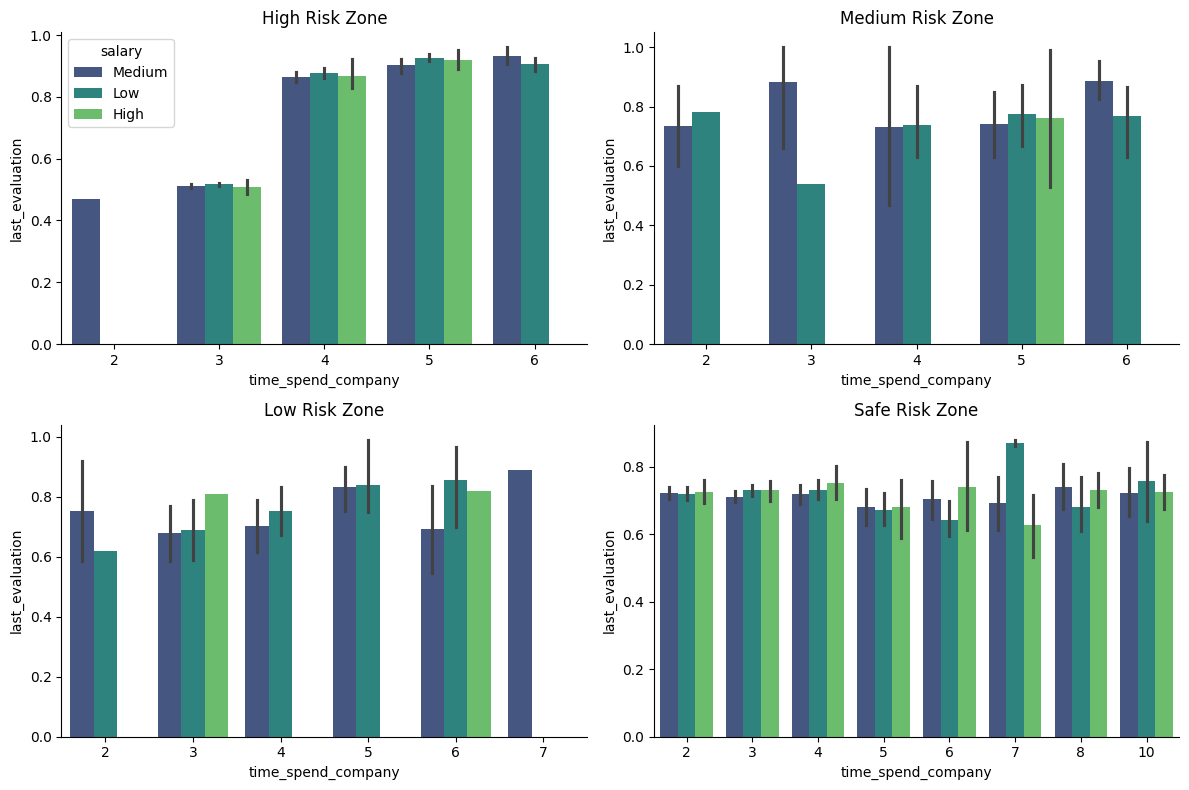

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8), dpi=100)
plt.subplots_adjust(wspace=5, hspace=5)
axs_flat = axes.flatten()

j=0
for i, risk in enumerate(['High','Medium','Low', 'Safe']):
    data=X_test_predicted[X_test_predicted['risk_zone']==risk]
    if i<2:
        sns.barplot(data=data, x='time_spend_company', y='last_evaluation', hue='salary', palette='viridis', ax=axes[0,i])
        axes[0,i].set_title(risk+' Risk Zone')
        axes[0,1].legend().set_visible(False)
    else:
        sns.barplot(data=data, x='time_spend_company', y='last_evaluation', hue='salary', palette='viridis', ax=axes[1,j])
        axes[1,j].set_title(risk+' Risk Zone')
        axes[1,j].legend().set_visible(False)
        j+=1


plt.tight_layout()
sns.despine()
plt.show()


###### High Risk Zone
In this zone, we see salary is not proportional to time spent with the company. eg. those who have 6 yrs at high risk of leaving do not have high salary
whereas there are some employees with 3-5 years who are having high salary. Also we see that employees who have spent 2-3 years with the company and have
received a poor evaluation are at high risk of leaving.
- Low Salary:
1. Conduct regular salary reviews and adjustments based on market trends and performance evaluations.
2. Provide opportunities for internal promotions and career advancement through skill development programs.
3. Offer employee assistance programs (EAPs) and counseling services to support well-being and mental health.
- Medium Salary:
1. Implement mentorship programs with senior leaders or industry experts to guide career progression.
2. Provide avenues for feedback and suggestions to address job satisfaction and engagement issues.
3. Offer recognition and rewards for innovation, creativity, and problem-solving initiatives.
- High Salary:
1. Provide opportunities for high-visibility projects or strategic initiatives to challenge and motivate employees.
2. Conduct regular engagement surveys to assess employee satisfaction and identify areas for improvement.
3. Offer competitive perks and benefits such as executive coaching, travel incentives, or sabbaticals


###### Medium Risk Zone
These are majorly low and medium salaried employees.
- Low Salary:
1. Provide opportunities for skill enhancement through on-the-job training, workshops, and mentorship.
2. Offer performance-based incentives or bonuses to recognize achievements and contributions.
3. Conduct regular career discussions to identify growth opportunities and career paths.
- Medium Salary:
1. Implement flexible work arrangements, including remote work options or compressed workweeks.
2. Provide access to professional development resources such as online courses, certifications, and conferences.
3. Offer competitive compensation packages with benefits tailored to employee needs and preferences.
- High Salary:
1. Encourage employee involvement in decision-making processes and organizational initiatives.
2. Provide opportunities for participation in industry conferences, seminars, and networking events.
3. Offer opportunities for high-impact projects or leadership roles to leverage skills and expertise.

###### Low Risk Zone
- Low Salary:
1. Provide clear pathways for career progression and promotion opportunities based on performance.
2. Offer additional training or educational reimbursement programs to enhance skills and qualifications.
3. Implement team-building activities and social events to foster camaraderie and teamwork.
- Medium Salary:
1. Conduct regular performance reviews with constructive feedback and goal-setting discussions.
2. Provide opportunities for cross-functional projects or job rotations to broaden skills and experiences.
3. Offer financial wellness programs and resources for budgeting, savings, and investment planning.
- High Salary:
1. Create a culture of innovation and creativity by encouraging idea generation and continuous improvement.
2. Establish recognition programs with rewards such as bonuses, incentives, or company-wide acknowledgments.
3. Offer personalized career development plans aligned with organizational goals and employee aspirations.

###### Safe Zone
The safe zone employees have had a good evaluation and we see that they have a long tenure with the company.
- Low Salary:
1. Offer non-monetary incentives such as recognition programs, certificates of achievement, and public acknowledgment.
2. Provide opportunities for skill development through training sessions and workshops.
3. Implement a mentorship program to guide career growth and foster a sense of belonging.
- Medium Salary:
1. Offer flexible work arrangements, such as remote work or flexible hours, to improve work-life balance.
2. Provide health and wellness benefits, including gym memberships, wellness programs, and mental health support.
3. Conduct regular feedback sessions to address concerns and encourage open communication.
- High Salary:
1. Provide opportunities for leadership roles or special projects to high-performing employees.
2. Offer competitive benefits packages, including retirement plans, stock options, and additional paid time off.
3. Implement career development plans tailored to individual goals and aspirations.

## End of Project